In [ ]:
pip install sewar

  Created wheel for sewar: filename=sewar-0.4.4-cp36-none-any.whl size=10389 sha256=10de632126fa2c838effbac71256e2f84ae342009e313f175fe5af8b3b34c6bf
  Stored in directory: /root/.cache/pip/wheels/6b/dd/1f/6bde4832a765007d4f58c9d8bbf82a82b263b7b85e58cbe935
Successfully built sewar


In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import sewar
import os
import skimage
from skimage.util import random_noise
#from skimage.util import img_as_float
#from scipy.signal import convolve2d
from scipy.misc import face
from scipy.signal.signaltools import wiener

In [ ]:
#im1=cv2.imread("/content/Bhoot.jpg",1)
im2=cv2.imread("/content/drive/MyDrive/Copy of PD Brain.png",1)

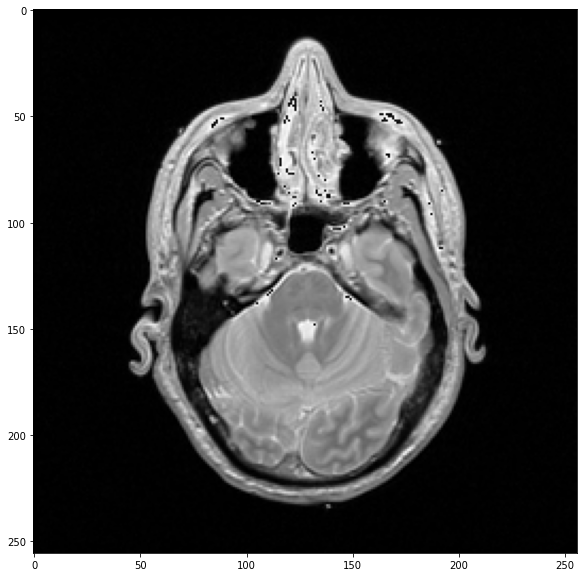

In [ ]:
img1=cv2.imread("/content/PD Brain.png",1)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.imshow(im2)


# **Concatenate** **Comparison**

In [ ]:
#median = cv2.medianBlur(img, 5)
#gauss = cv2.GaussianBlur(img, (5,5), 0)
fig = plt.gcf()
fig.set_size_inches(20,10)
#images = np.concatenate((im1,im2),axis=1)
plt.imshow(images)

NameError: ignored

<Figure size 1440x720 with 0 Axes>

#**Adding Noise**
Parameters
----------
image : ndarray
    Input image data. Will be converted to float.
mode : str
    One of the following strings, selecting the type of noise to add:

    'gauss'     Gaussian-distributed additive noise.
    'poisson'   Poisson-distributed noise generated from the data.
    's&p'       Replaces random pixels with 0 or 1.
    'speckle'   Multiplicative noise using out = image + n*image,where
                n is uniform noise with specified mean & variance.


In [ ]:
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      #vals = len(np.unique(image))
      #vals = 2 ** np.ceil(np.log2(vals))
      #noisy = np.random.poisson(image * vals) / float(vals)
      noisy = random_noise(image,'poisson')
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

In [ ]:
gauss=noisy("gauss",im2)

In [ ]:
sp=noisy("s&p",im2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [ ]:
poisson=noisy("poisson",im2)

In [ ]:
speckle=noisy("speckle",im2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


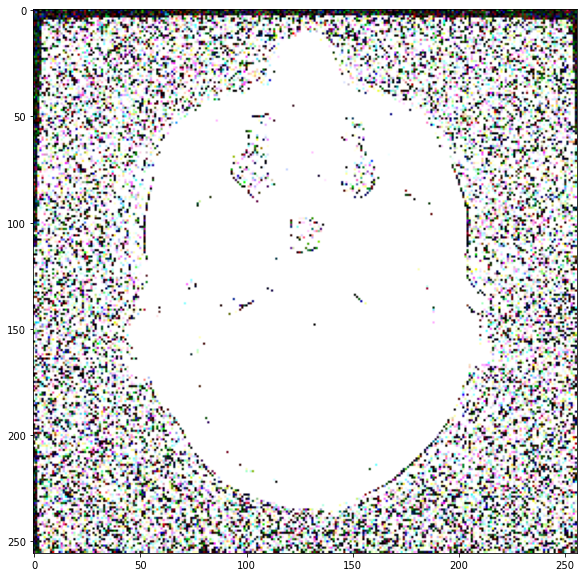

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.imshow(gauss)

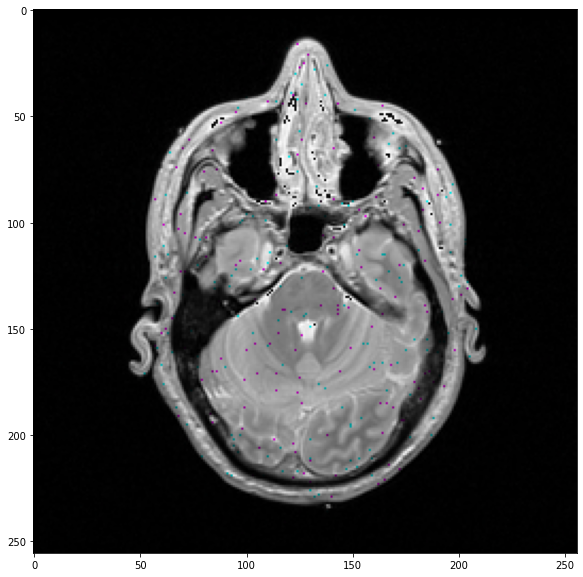

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.imshow(sp)

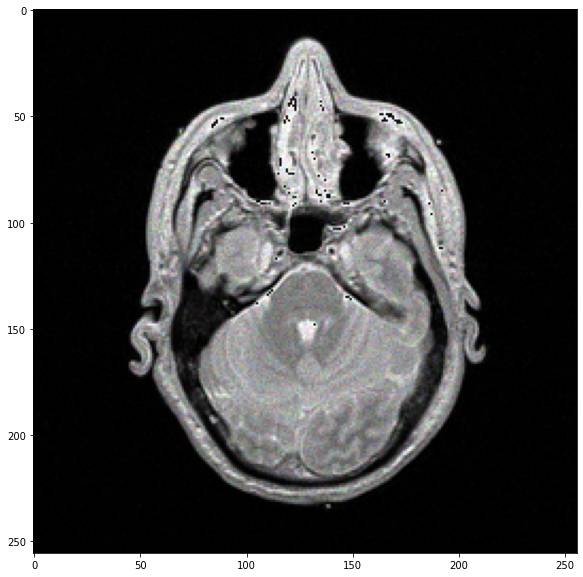

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.imshow(poisson)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


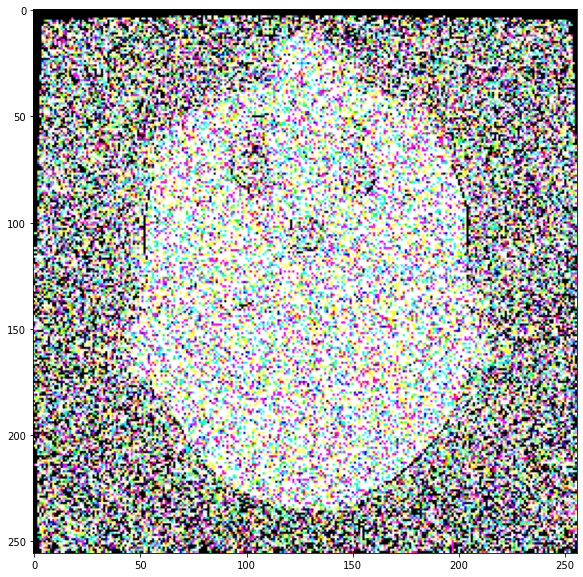

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.imshow(speckle)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


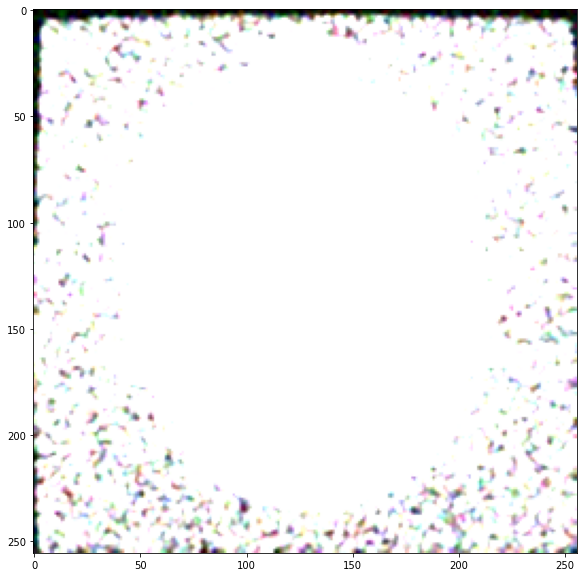

In [ ]:
fgauss = cv2.GaussianBlur(gauss, (5,5), 0)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.imshow(fgauss)

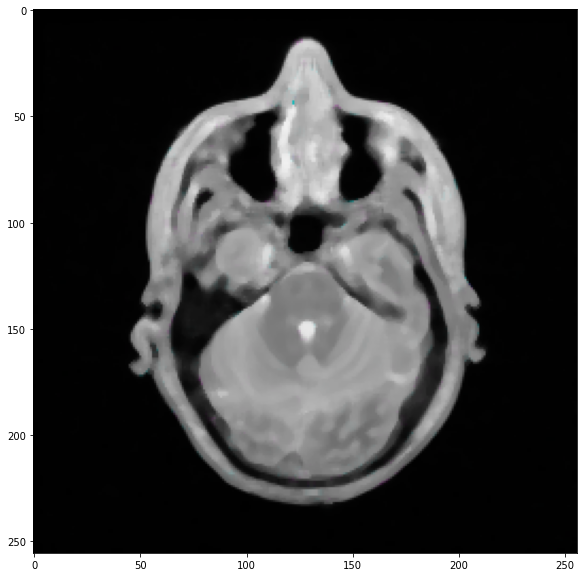

In [ ]:
fsp= cv2.medianBlur(sp, 5)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.imshow(fsp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


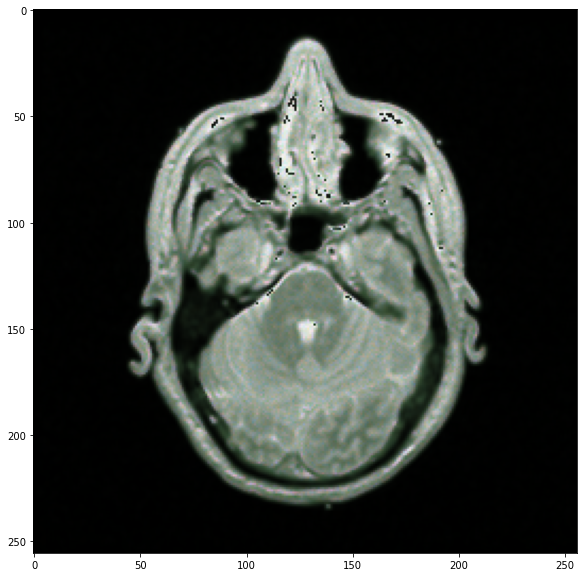

In [ ]:
fpoisson = wiener(poisson)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.imshow(fpoisson)